# - Barcelona Pass Data -

## 1. Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
from PIL import Image
import matplotlib.patches as mpatches
from pywaffle import Waffle

## 2. Read & Merge Data

In [31]:
team = 'barcelona'

df = pd.read_csv(f'/work/assets/fbref/team/{team}/team/pass_data.csv')
df2 = pd.read_csv(f'/work/assets/fbref/team/{team}/team/passtype_data.csv')
df3 = pd.read_csv(f'/work/assets/fbref/team/{team}/team/attack.csv')
df2 = df2.rename(columns={'player':'Player'})
df3 = df3.rename(columns={'player':'Player'})
df = df.rename(columns={'player':'Player'})
df_pass = df2.merge(df, how='outer', on='Player')
df_pass = df_pass.merge(df3, how='outer', on='Player')

df_pass


,Player,press,switch,intercepted,blocked,Position,Minute90,Attempt,Completed,Sucpct,...,s_fld,s_def,gca,gca90,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def
0,Frenkie de Jong,223,28,32,20,"MF,DF",24.5,1907,1740,91.2,...,5,0,5,0.21,5,0,0,0,0,0
1,Jordi Alba,106,27,26,60,DF,22.1,1846,1590,86.1,...,0,0,6,0.28,6,0,0,0,0,0
2,Lionel Messi,261,29,42,51,"FW,MF",22.6,1584,1297,81.9,...,18,2,27,1.25,17,0,7,2,1,0
3,Antoine Griezmann,104,16,10,19,"FW,MF",18.5,778,677,87.0,...,1,0,6,0.34,6,0,0,0,0,0
4,Marc-André ter Stegen,62,12,6,0,GK,20.0,634,573,90.4,...,0,0,0,0.00,0,0,0,0,0,0
5,Sergio Busquets,151,28,22,11,MF,17.6,1636,1493,91.3,...,2,1,4,0.24,4,0,0,0,0,0
6,Clément Lenglet,91,29,19,9,DF,18.1,1370,1267,92.5,...,0,1,3,0.18,3,0,0,0,0,0
7,Pedri,165,26,27,27,MF,18.6,1089,942,86.5,...,3,1,6,0.34,3,0,0,0,2,1
8,Sergiño Dest,62,1,14,29,DF,14.5,852,754,88.5,...,0,0,1,0.07,1,0,0,0,0,0
9,Óscar Mingueza,76,5,10,16,DF,13.6,899,815,90.7,...,0,1,3,0.24,3,0,0,0,0,0


## 3. Settings Club-Logo On Background

In [4]:
# convert()
# -L -> グレースケール
# -LA -> アルファ値を考慮したグレースケール
# HSV -> hue(色相) Saturation(彩度) Value(明度)
# point()
# - lambda x: x * 1.5 (1.5倍の明るさにする)
# - lambda x: x * 0.5 (0.5倍の明るさにする)

# セピア化
# - gray = img.convert('L')
# Image.merge('RGB',(
#                     gray.point(lambda x: x * 240/ 255),
#                     gray.point(lambda x: x * 200 / 255),
#                     gray.point(lambda x: x * 145 / 255)
# ))

# ガンマ変換
# - def gamma_table(gamma_r, gamma_g, gamma_b, gain_r=1.0, gain_g=1.0, gain_b=1.0):
#     r_tbl = [min(255, int((x / 255.) ** (1. / gamma_r) * gain_r * 255.)) for x in range(256)]
#     g_tbl = [min(255, int((x / 255.) ** (1. / gamma_g) * gain_g * 255.)) for x in range(256)]
#     b_tbl = [min(255, int((x / 255.) ** (1. / gamma_b) * gain_b * 255.)) for x in range(256)]
#     return r_tbl + g_tbl + b_tbl
# img.point(gamma_table(1.2, 0.5, 0.5))

# getbbox
# - 画像内で値が０でない最小領域を返す。値が全て０ならばNoneを返す
# alpha = Image.open("alpha.png")
# crop = alpha.split()[-1].getbbox()
# alpha.crop(crop)

# resize
# - img.resize((128, 128), Image.LANCZOS)

# 参考URL（https://qiita.com/pashango2/items/145d858eff3c505c100a）

img = Image.open(f'/code/assets/image/{team}.png').convert('L')
logo = img.copy()
logo.putalpha(60)

## Scatter Plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in true_divide


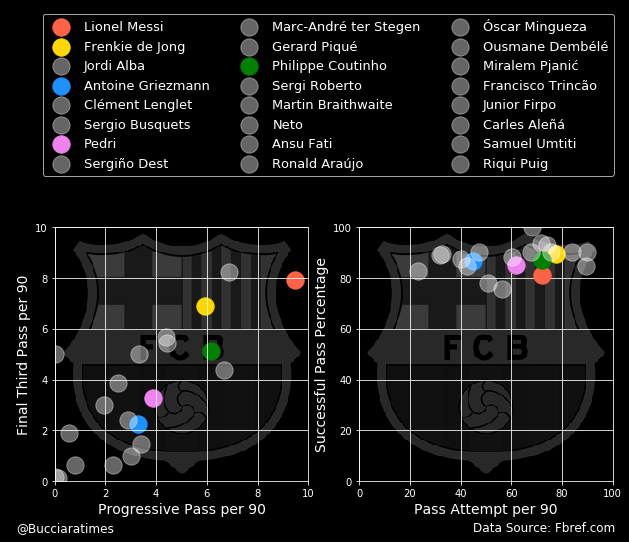

In [5]:

plt.style.use('dark_background')

colors = ['white', 'tomato', 'dodgerblue', 'gold' ,'green', 'violet', 'darkviolet']
pickup_player = ['Frenkie de Jong', 'Lionel Messi','Ousmane Dembélé','Antoine Griezmann','Philippe Coutinho','Pedri']
plt_size = 300

Xtheme = 'Progcount'
Ytheme = 'Finalthird'
Xtheme2 = 'Attempt'
Ytheme2 = 'Sucpct'

xrange = 10
yrange = 10
xrange2 = 100
yrange2 = 100

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].imshow(logo,extent=[0,xrange, 0,yrange])
axes[1].imshow(logo,extent=[0,xrange2, 0,yrange2])

axes[0].grid(True)
axes[1].grid(True)

for i in range(df.shape[0]):   
    if [name for name in df_pass['Player']][i]==pickup_player[1]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[1],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[1])
        
    elif [name for name in df_pass['Player']][i]==pickup_player[3]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[2],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[2])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[4]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[4],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[4])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[0]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[3],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[3])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[5]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[5],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[5])
    else:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=0.4,
            s=plt_size,
            color=colors[0],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=0.4, 
            s=plt_size, 
            color=colors[0])
            
        axes[1].set_axisbelow(True)

axes[0].set_xlim(0, xrange)
axes[0].set_ylim(0, yrange)
axes[1].set_xlim(0, xrange2)
axes[1].set_ylim(0, yrange2)
axes[0].set_xlabel('Progressive Pass per 90', fontsize=14)
axes[0].set_ylabel('Final Third Pass per 90', fontsize=14)
axes[1].set_xlabel('Pass Attempt per 90', fontsize=14)
axes[1].set_ylabel('Successful Pass Percentage', fontsize=14)
# plt.gcf().text(0,-0.05,"@Bucciaratimes")
plt.text(-135,-20, '@Bucciaratimes', color='white',fontsize=12) 
plt.text(45,-20, "Data Source: Fbref.com",fontsize=12)
fig.legend(bbox_to_anchor=(0.05,1),loc=3, fontsize=13, ncol=3)
# fig.savefig('/work/output/barcelona/pickup_oam_player_pass1.png',bbox_inches='tight')

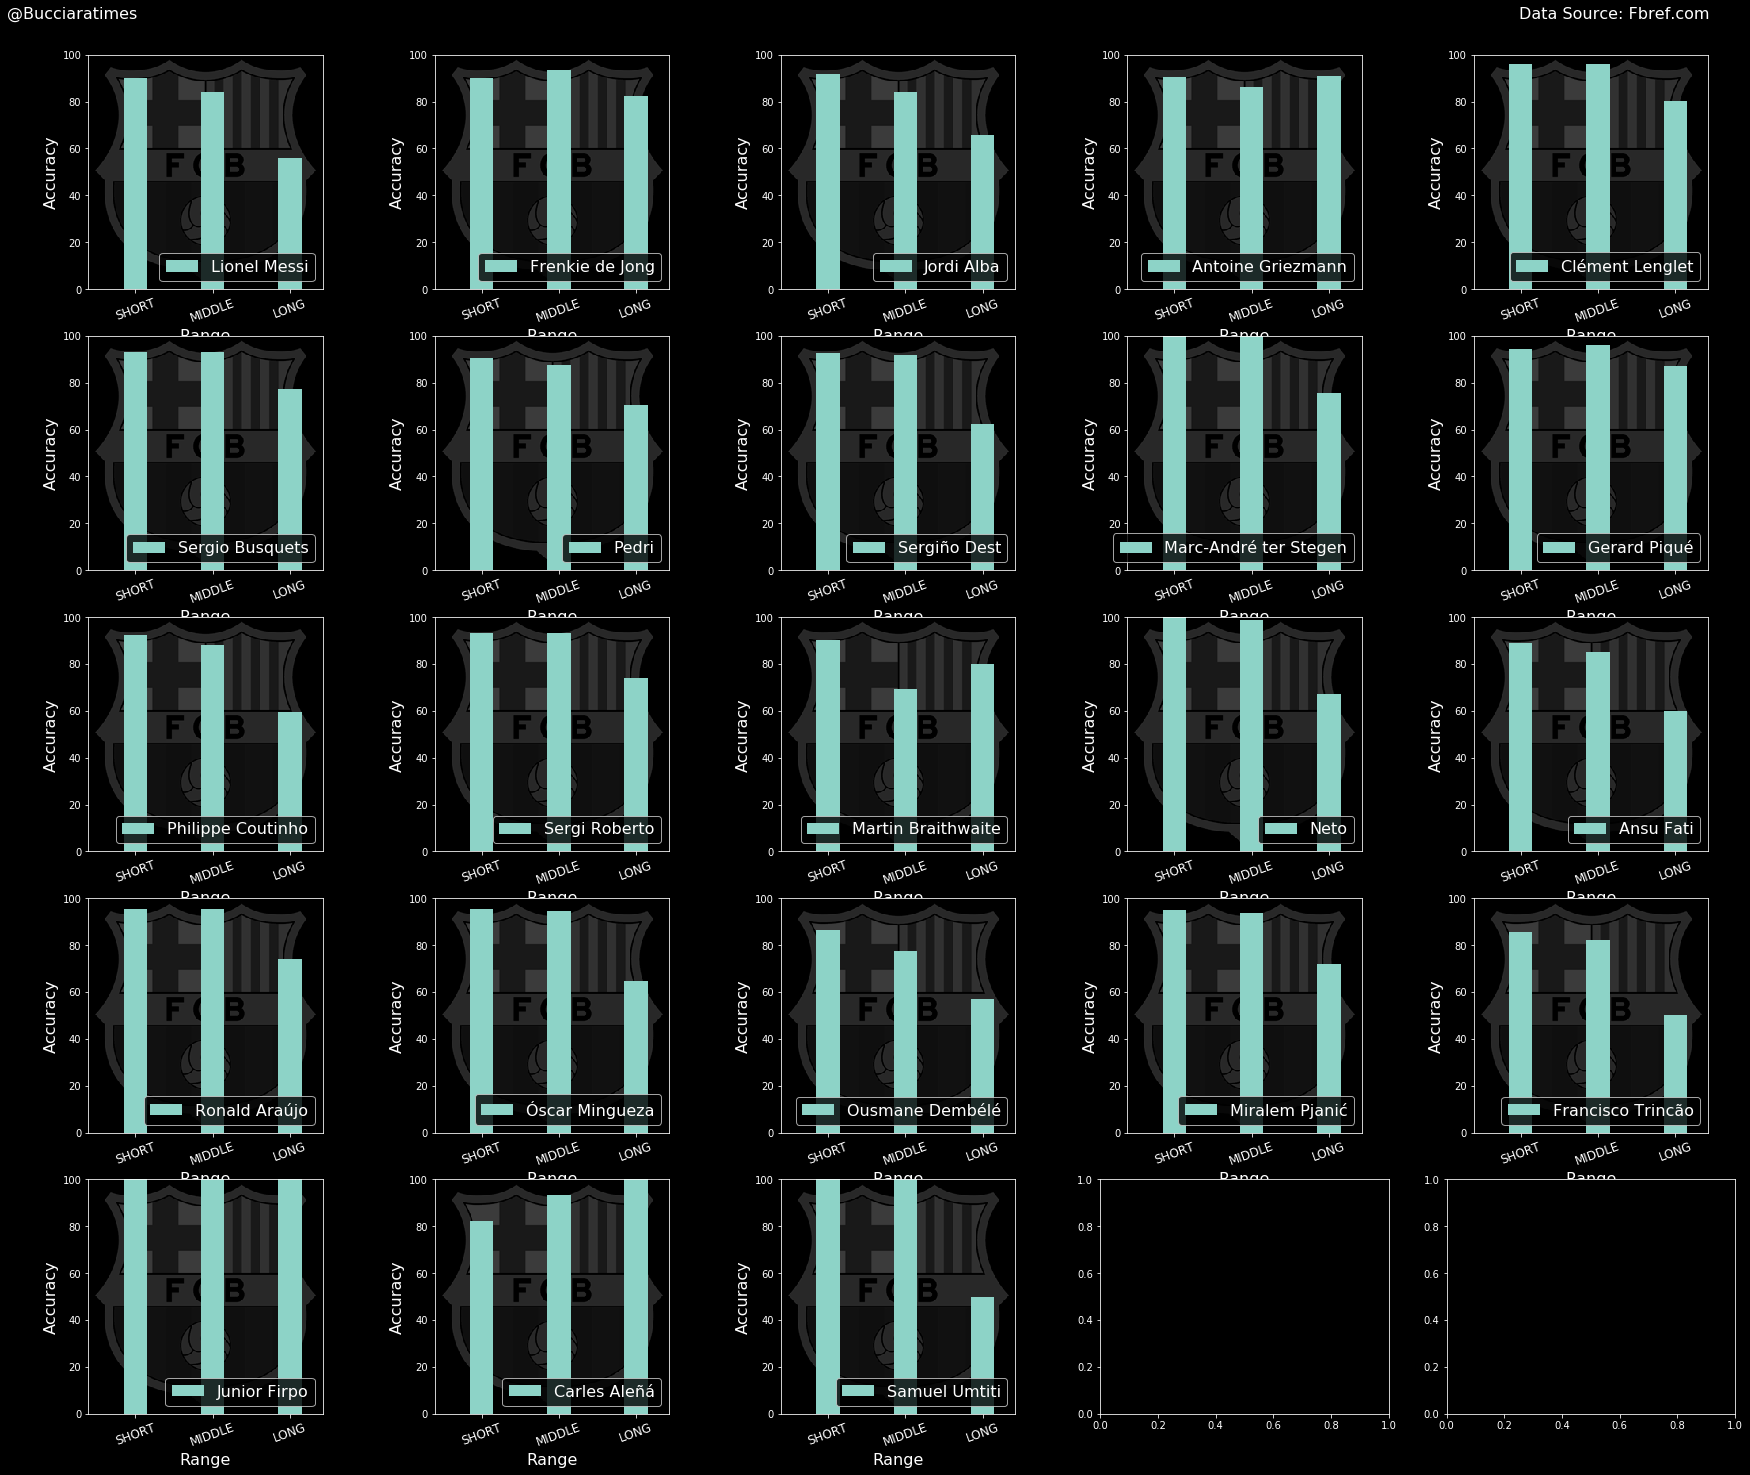

In [6]:
df_range = df_pass[['ShortPct', 'MediPct', 'LongPct']].T
df_range.rename(columns=df_pass['Player'])
plt.style.use('dark_background')
color = ['dodgerblue','tomato','lime','plum','green','gold','red','navy']

fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(30,25))
row = 0
col = 0
X = range(20,100,33)
for i in range(23):
    axes[row,col].imshow(logo,extent=[0, 100, 0, 100])
    axes[row,col].set_ylim(0,100)
    axes[row,col].set_xlim(0,100)
    axes[row,col].bar(X,df_range.iloc[:,i], align="center", width=10,tick_label=['SHORT','MIDDLE','LONG'],label=df_pass.iloc[i,0])
    axes[row,col].set_xlabel('Range',fontsize=16)
    axes[row,col].set_ylabel('Accuracy',fontsize=16)
    axes[row,col].legend(loc='lower right',fontsize=16)
    axes[row,col].set_xticklabels(['SHORT','MIDDLE','LONG'],rotation=20, fontsize=12)
    col += 1
    if col == 5:
        col = 0
        row += 1
    elif row == 5:
        break
plt.gcf().text(0.1,0.90,"@Bucciaratimes",fontsize=16)
plt.gcf().text(0.8,0.90,"Data Source: Fbref.com",fontsize=16)
plt.show()

fig.savefig('/code/output/barcelona/range1227.png')

In [7]:
df_range2 = df_pass[['ShortPass','MediPass','LongPass']]
df_range2 = df_range2.T
df_range2 = df_range2.rename(columns=df_pass['Player'])

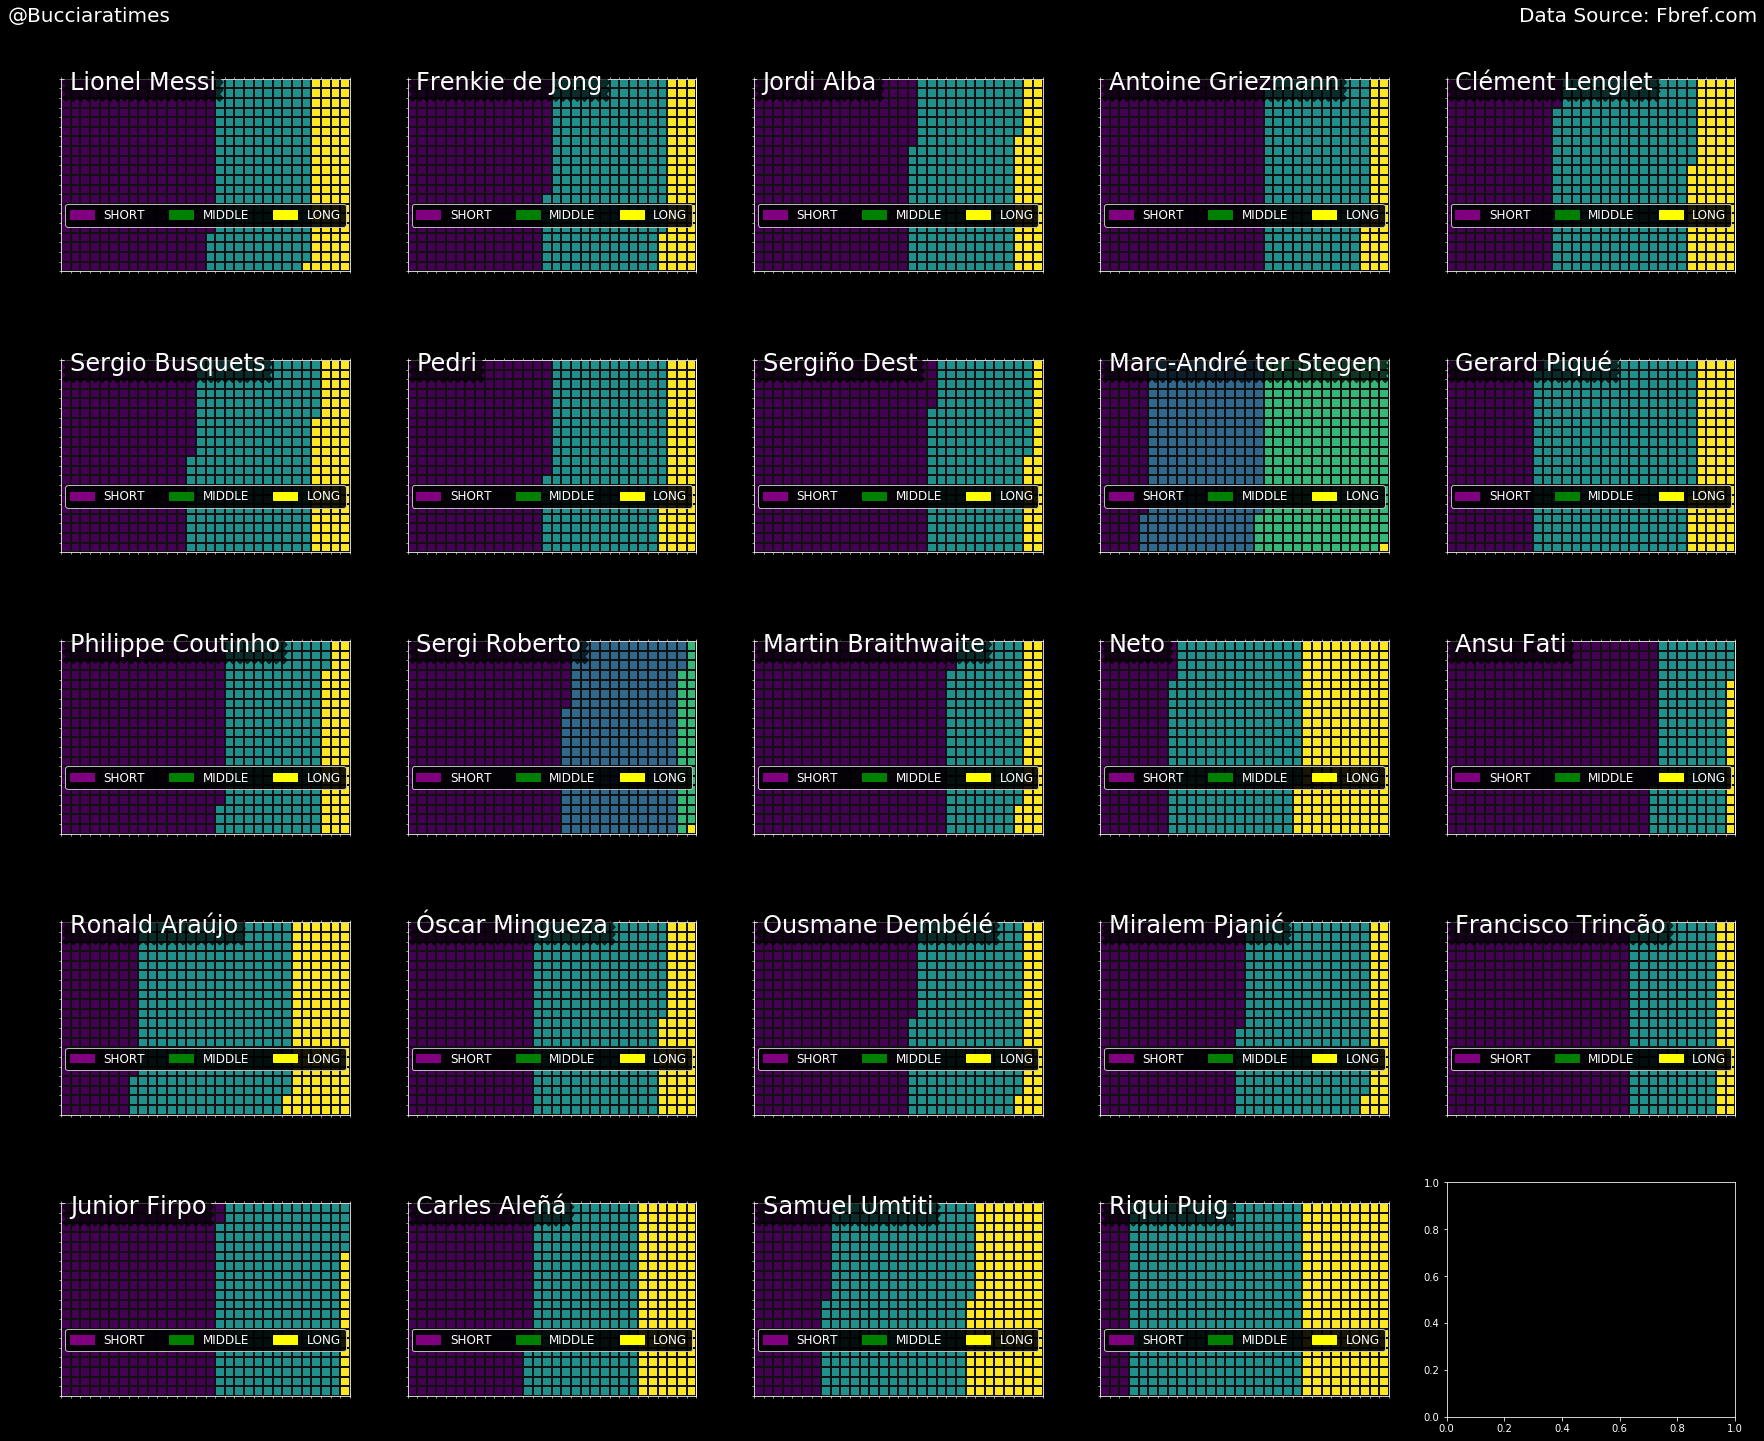

In [9]:

fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(30,25))
colormap = plt.cm.viridis
colors = ['purple','green','yellow']

width = 30
height = 20
row = 0
col = 0
names = df_range2.columns.tolist()

for name in names:  
    total = df_range2[name].sum()
    proportions = [(value / total) for value in df_range2[name]]
    waffle_size = width * height
    each_tile_size = [round(proportion * waffle_size)for proportion in proportions]
    waffle = np.zeros((height, width))
    each_tile_index = 0
    tile_index = 0
    
#     縦方向にループさせたいからcolumns->rowでネスト
    for c in range(width):
        for r in range(height):
            tile_index += 1
#             tileの色の切り替えのコード
            if tile_index > sum(each_tile_size[0:each_tile_index]):
                each_tile_index += 1
            waffle[r,c] = each_tile_index
            
   
    axes[row,col].matshow(waffle, cmap=colormap, alpha=1)
    axes[row,col].set_xticks(np.arange(-0.5, (width), 1), minor=True)
    axes[row,col].set_yticks(np.arange(-0.5, (height), 1), minor=True)
    axes[row,col].grid(which='minor', color='#111111', linestyle='-', linewidth=2)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
    
    label_num = df_range2[name]
    label_name = ['SHORT', 'MIDDLE', 'LONG']
    value_sign = ''
    values_cumsum = np.cumsum(label_num)
    values = values_cumsum[len(values_cumsum) - 1]
    legend_handles = []
    for i, label in enumerate(label_name):
        if value_sign == '%':
            label_str = label + '(' + str(label_num[i]) + value_sign + ')'
        else:
            label_str = label
#             label_str = label + '(' + value_sign + str(label_num[i]) + ')'
        color_val = colormap(float(values_cumsum[i]) / values)
        legend_handles.append(mpatches.Patch(color=colors[i], label=label_str))
    
    axes[row,col].legend(
        handles=legend_handles,
        loc = 'lower center',
        ncol=len(label_name),
        bbox_to_anchor=(0.5, 0.2), # positioning of legend
        framealpha=0.9,
        fontsize=12
    )
    boxdic = {
    'color':'black',
    "boxstyle": "sawtooth",
    "linewidth" : 1,
    'alpha':0.7
    }
    axes[row,col].text(0.4, 0.6, name, size=24, bbox=boxdic)
    
    
    col += 1
    if col == 5:
        col = 0
        row += 1
    elif row == 5:
        break
        
#     fig, ax = plt.subplots(rows, cols, figsize=figsize)
#     for idx, r in enumerate(np.arange(-1, 1.1, 0.1)):
#         # 各plotのどこに配置するかを計算
#         row_i = idx//cols 
#         col_i = idx%cols
#         #相関係数に対してランダムな値を計算
#         x, y, actual_r = generate_values(r=r)
#         #生成したランダム値から実際の相関係数を表示
#         title = 'r={:.2f}'.format(actual_r)
#         ax[row_i, col_i].set_title(title)
#         ax[row_i, col_i].scatter(x, y, alpha=0.3, s=1)

    


plt.gcf().text(0.1,0.90,"@Bucciaratimes",fontsize=20)
plt.gcf().text(0.8,0.90,"Data Source: Fbref.com",fontsize=20)
plt.style.use('dark_background')
fig.savefig('/code/output/barcelona/range_waffle.png')

    


In [98]:
df_range2['Pedri']

ShortPass    242
MediPass     201
LongPass      54
Name: Pedri, dtype: int64

In [72]:
waffle = np.zeros((height,width))
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1     
        waffle[row,col] = category_index
#         print(waffle[row,col])

fig = plt.figure()
colormap = plt.cm.inferno
plt.matshow(waffle,cmap=colormap, label='ansu fati')

# get current axes
ax = plt.gca()

# 目盛りの設定（-0.5指定をすることで間隔を調整）
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

# 罫線の設定
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# 空のリストで目盛りをなくす
plt.xticks([])
plt.yticks([])

# legend settings
values = [1,2,3]
categories = ['america', 'japan', 'argen']
value_sign = ''
values_cumsum = np.cumsum(values)
total_values = values_cumsum[len(values_cumsum) - 1]
legend_handles = []
for i, category in enumerate(categories):
    if value_sign == '%':
        label_str = category + ' (' + str(values[i]) + value_sign + ')' 
    else:
        label_str = category + ' (' + value_sign + str(values[i]) + ')'
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories),
          bbox_to_anchor=(0., 0.2, 0.95, 0.1)) #positioning legends
# colorbarの表示
plt.colorbar()

NameError: name 'tiles_per_category' is not defined

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: invalid value encountered in true_divide


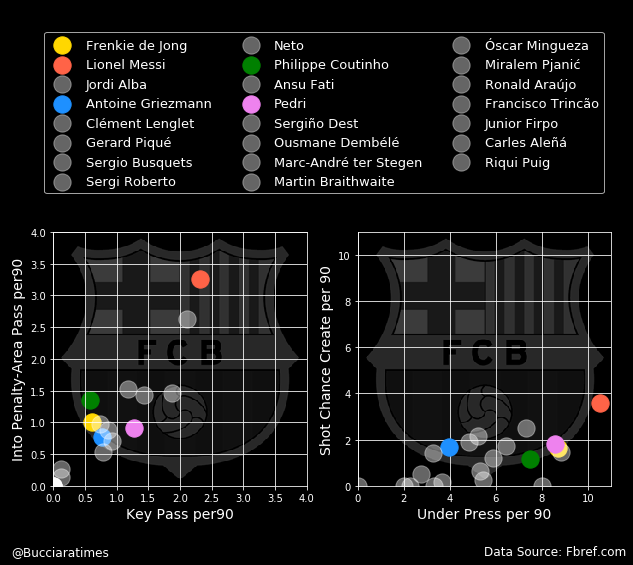

In [77]:
plt.style.use('dark_background')

colors = ['white', 'tomato', 'dodgerblue', 'gold' ,'green', 'violet', 'darkviolet']
pickup_player = ['Frenkie de Jong', 'Lionel Messi','Ousmane Dembélé','Antoine Griezmann','Philippe Coutinho','Pedri']
plt_size = 300

Xtheme = 'Keypass'
Ytheme = 'Penalty'
Xtheme2 = 'press'
Ytheme2 = 's_passlive'

xrange = 4
yrange = 4
xrange2 = 11
yrange2 = 11


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].imshow(logo,extent=[0,xrange, 0,yrange])
axes[1].imshow(logo,extent=[0,11, 0,11])

axes[0].grid(True)
axes[1].grid(True)

for i in range(df.shape[0]):   
    if [name for name in df_pass['Player']][i]==pickup_player[1]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[1],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[1])
        
    elif [name for name in df_pass['Player']][i]==pickup_player[3]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[2],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[2])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[4]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[4],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[4])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[0]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[3],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[3])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[5]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[5],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[5])
    else:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=0.4,
            s=plt_size,
            color=colors[0],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=0.4, 
            s=plt_size, 
            color=colors[0])
            
        axes[1].set_axisbelow(True)

axes[0].set_xlim(0, xrange)
axes[0].set_ylim(0, yrange)
axes[1].set_xlim(0, xrange2)
axes[1].set_ylim(0, yrange2)
axes[0].set_xlabel('Key Pass per90', fontsize=14)
axes[0].set_ylabel('Into Penalty-Area Pass per90', fontsize=14)
axes[1].set_xlabel('Under Press per 90', fontsize=14)
axes[1].set_ylabel('Shot Chance Create per 90', fontsize=14)
# plt.gcf().text(0,-0.05,"@Bucciaratimes")
plt.text(-15,-3,'@Bucciaratimes', color='white',fontsize=12) 
plt.text(5.5,-3, "Data Source: Fbref.com",fontsize=12)
fig.legend(bbox_to_anchor=(0.45,1.5),loc=9, fontsize=13, ncol=3)
# fig.savefig('/work/output/barcelona/pickup_oam_player_pass2.png',bbox_inches='tight')

In [18]:
type(df_range['Lionel Messi'].iloc[1])

numpy.float64

In [46]:
label_num = df_range2['Lionel Messi']
values_cumsum = np.cumsum(label_num)
values = values_cumsum[len(values_cumsum) - 1]

In [57]:
values_cumsum[2]

544

In [49]:
label_num

ShortPass    278
MediPass     185
LongPass      81
Name: Lionel Messi, dtype: int64

In [50]:
values

544

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from PIL import Image
import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import htext
from pywaffle import Waffle
df1 = pd.read_csv('/work/assets/fbref/report/barcelona.csv')
df2 = pd.read_csv('/work/assets/fbref/report/real.csv')
df3 = pd.read_csv('/work/assets/fbref/report/atletico.csv')
df4 = pd.read_csv('/work/assets/fbref/report/sevilla.csv')

bdf = [df1,df2,df3,df4]
df = pd.concat(bdf)
# df.columns.tolist()

In [2]:
y= df['G+A_Per 90 Minutes'].tolist()
x = df['xG+xA_Per 90 Minutes'].tolist()

df['y'] = y
df['x'] = x
df = df.dropna()
# df = df.drop(columns=['Player'])
df = df.loc[:,~df.columns.duplicated()]
df = df[df['Pos_x']!='DF']

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text major ticklabel objects>)

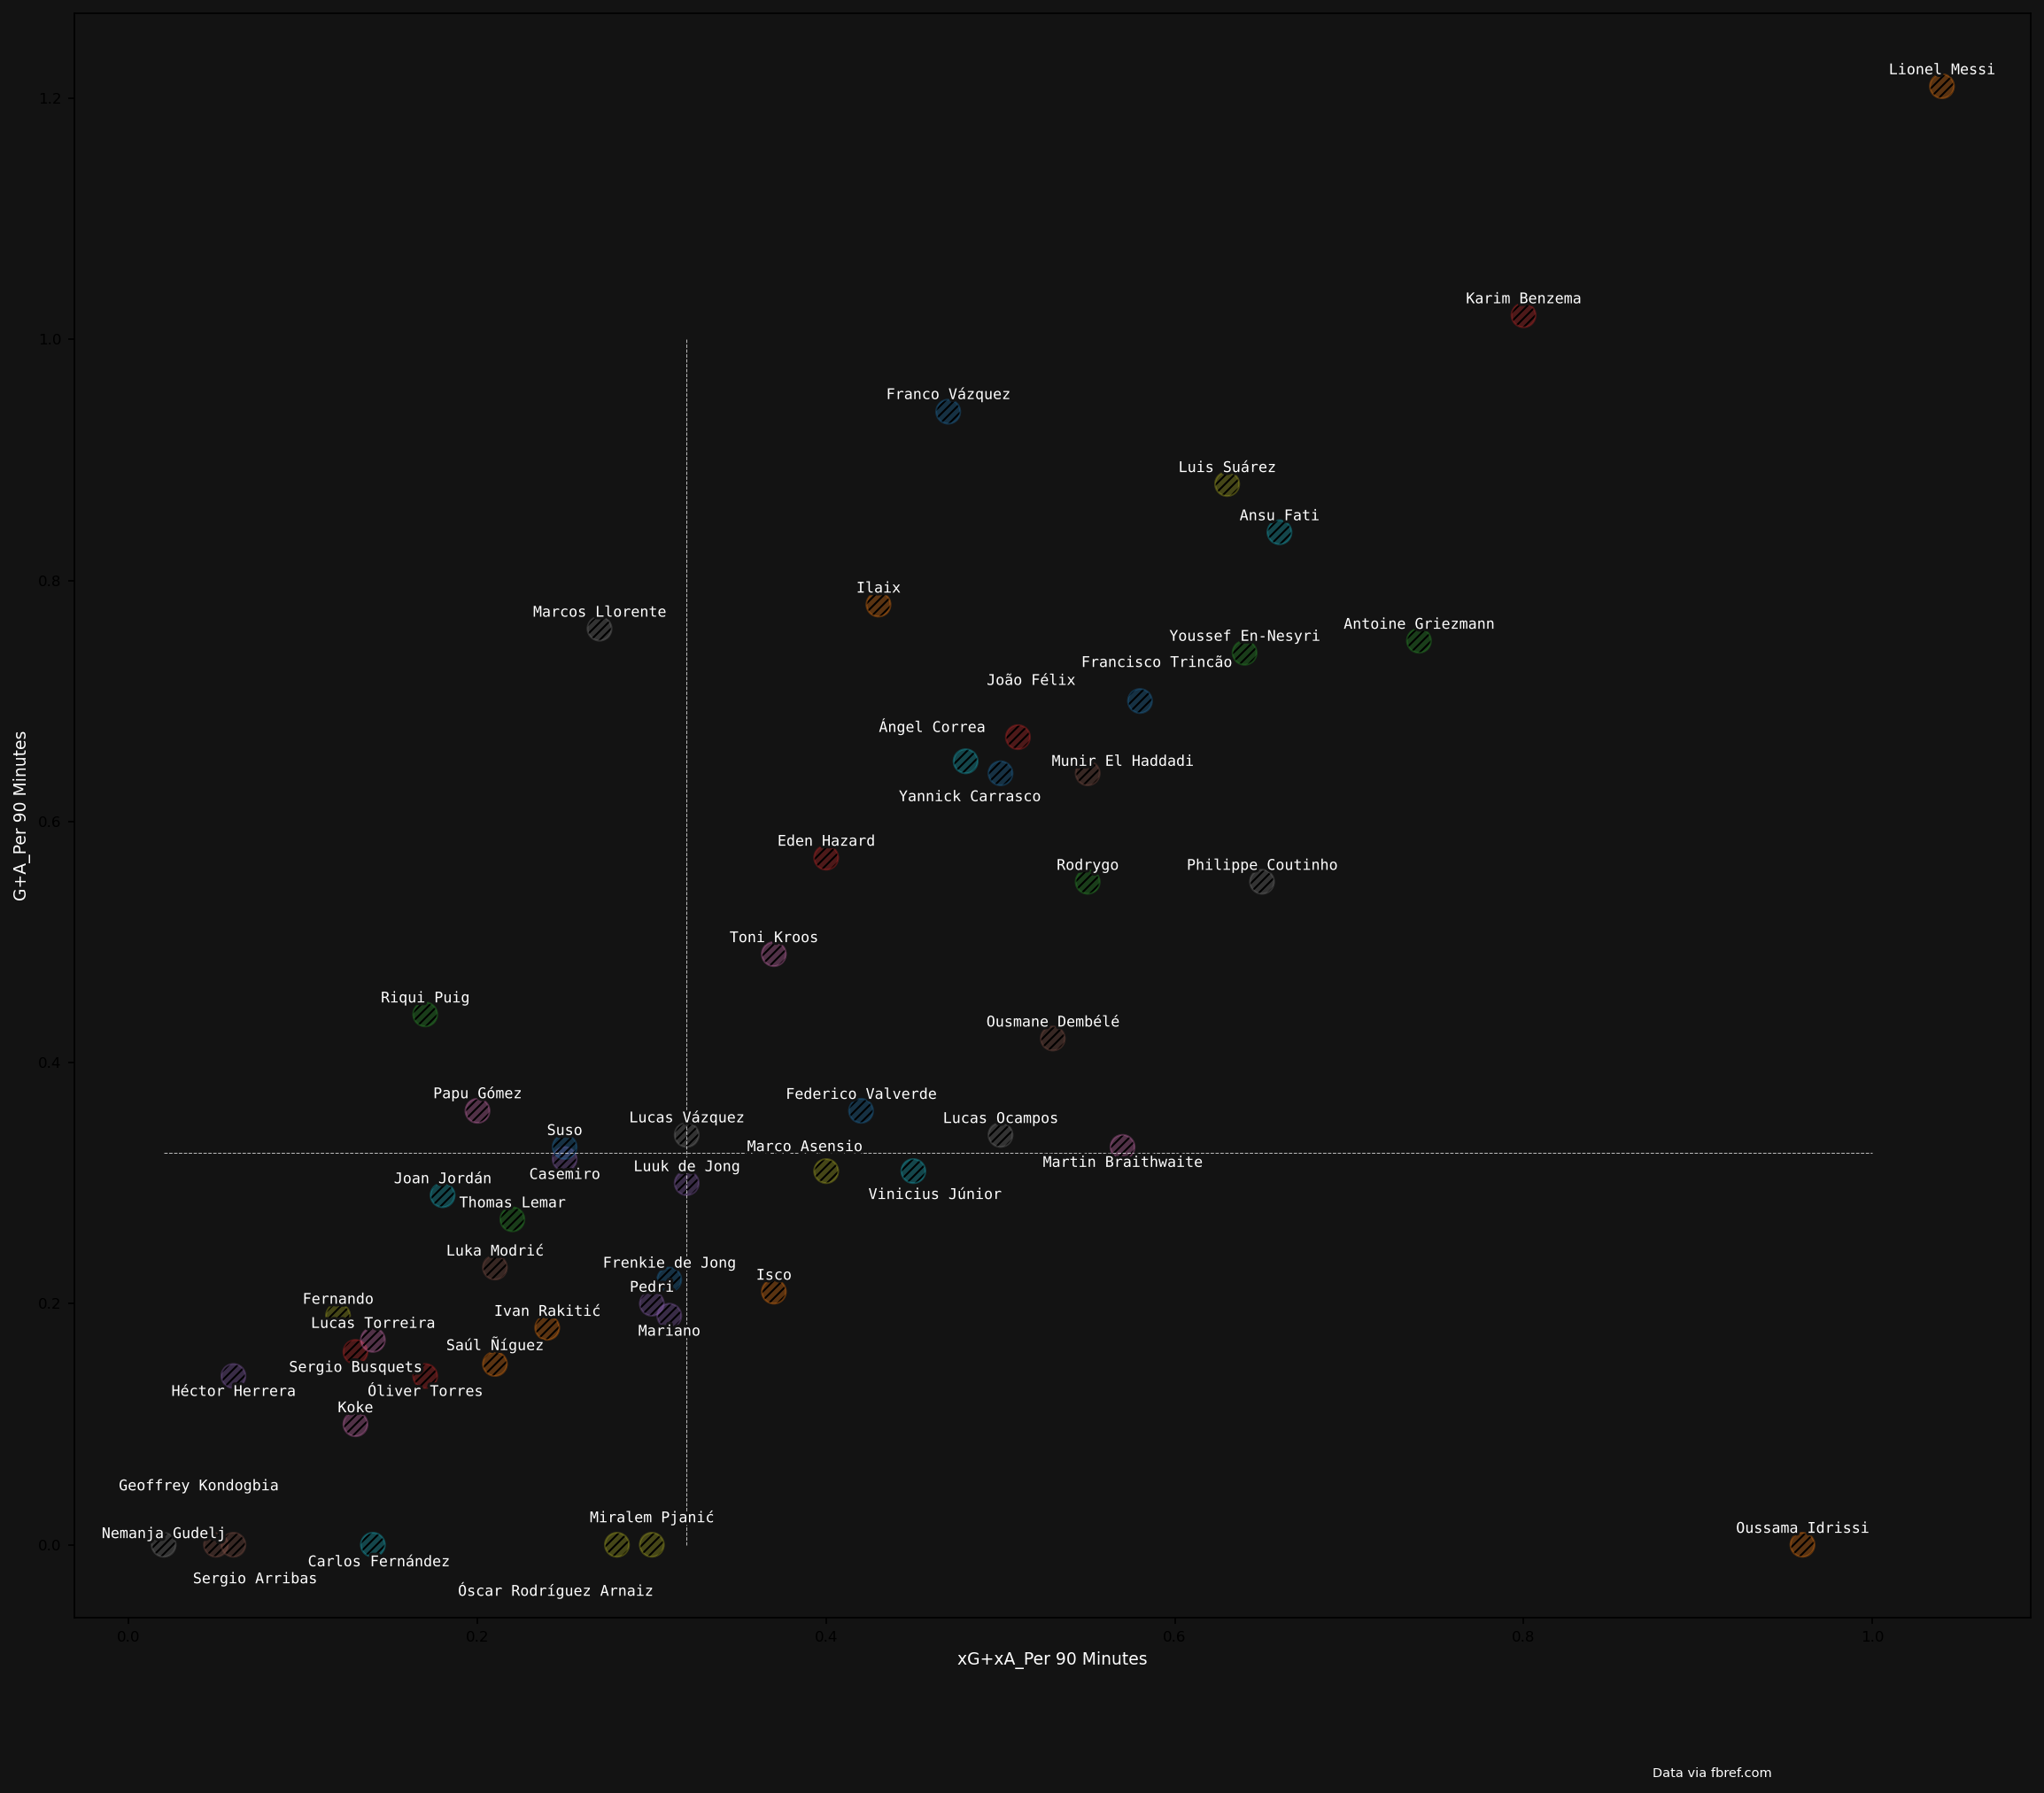

In [3]:

fig, ax = plt.subplots(
    facecolor='#131313', figsize=(19,16), dpi=150
)
ax.set_facecolor('#131313')
fig.text(x=.75,y=.05,s='Data via fbref.com',color='#ffffff', fontsize=7)


ax.set_ylabel('G+A_Per 90 Minutes',color='#ffffff',fontsize=9)
ax.set_xlabel('xG+xA_Per 90 Minutes',color='#ffffff',fontsize=9)



for idx,row in df.iterrows():
#     if row['Player'] == 'Marc-André ter Stegen':
#         ax.scatter(row['x'],row['y'],s=250,c='dodgerblue',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Neto':
#         ax.scatter(row['x'],row['y'],s=250,c='seagreen',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Jan Oblak':
#         ax.scatter(row['x'],row['y'],s=250,c='#D61361',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Thibaut Courtois':
#         ax.scatter(row['x'],row['y'],s=250,c='#D66C13',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Jasper Cillessen':
#         ax.scatter(row['x'],row['y'],s=250,c='#B013D8',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Claudio Bravo':
#         ax.scatter(row['x'],row['y'],s=250,c='#C6C538',marker='o',hatch=5*'/',zorder=5)
        
    ax.scatter(row['x'],row['y'], s=170 ,hatch=5*'/', alpha=.3)
    
text_values = df[['x','y','Player']].values 
texts = [
    ax.text(val[0],val[1],val[2],
            size=8, color='#ffffff', zorder=5,
            fontfamily='monospace') for val in text_values
]
[text.set_path_effects([mpl.patheffects.withStroke(
    linewidth=3, foreground='#131313'
)]) for text in texts]

adjust_text(
    texts, autoalign='y',
    only_move={'points':'y', 'text':'xy'}, 
    force_objects=(0.5, 3), force_text=(0.5, 3), 
    force_points=(0.5, 7)
)
min_x = df['x'].min()
max_x = df['x'].max()
max_x = round(max_x)
max_y = df['y'].max()
max_y = round(max_y)
min_y = df['y'].min()


median_x = df['x'].median()
median_y = df['y'].median()

# ax.set_xlim([min_x - .1,.7])
# ax.set_ylim([50,90])


ax.plot(
    [median_x,median_x],[min_y,max_y],
    color='#ffffff', ls="--", lw=.5, alpha=0.7, zorder=1
)
ax.plot(
    [min_x,max_x],[median_y,median_y],
    color='#ffffff', ls="--", lw=.5, alpha=0.7, zorder=1
)
mpl.rcParams['xtick.color'] = '#ffffff'
mpl.rcParams['ytick.color'] = '#ffffff'
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# image = Image.open('/work/assets/image/barcelona_small2.png')
# alpha = Image.new("L", image.size, 10)
# ax_image = fig.add_axes((0.25, 0.1, 0.8, 0.8))
# ax_image.axis('off')
# image.putalpha(alpha)
# ax_image.imshow(image)

# htext.fig_text(
#     x=.15,y=.9,
#     s="GK Performance of Laliga\n<Ter> <Neto> <Oblak> <Courtois> <Cillessen> <Bravo>",
#     fontsize=12,
#     color='#ffffff',
#     highlight_colors=['dodgerblue','seagreen','#D61361','#D66C13', '#B013D8','#C6C538'],
# #     highlight_weights = '',
#     fontname='monospace'
# )

# plt.savefig(f'/work/output/report/ter.png', bbox_inches='tight', transparent=True, dpi=500, facecolor='#131313')

In [106]:
df['Player']=='Marc-André ter Stegen'

0     False
1     False
2     False
3     False
4     False
5     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
18    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
30    False
31    False
32    False
33     True
36    False
37    False
Name: Player, dtype: bool

In [37]:
# df = pd.read_csv('/work/assets/fbref/position/gk/Marc-Andre-ter-Stegen.csv')

In [3]:
np.__file__

'/opt/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'

In [27]:
a1 = np.array([[1,2,3],[12,3,3], [1,2,3]])
a2 = np.array([[1,2,3],[12,3,3], [1,2,3]])
a3 = np.array([[[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]])
a3[0][0][0]
b1 = np.arange(0,11,2)
b2 = np.arange(10,)

array([ 0,  2,  4,  6,  8, 10])

,Unnamed: 0,Player,Nation_x,Pos_x,Age_x,MP_Playing Time,Starts_Playing Time,Min_Playing Time,90s_Playing Time,Gls_Performance,...,Crs_Performance,Int_Performance,TklW_Performance,PKwon_Performance,PKcon_Performance,OG_Performance,Recov_Performance,Won_Aerial Duels,Lost_Aerial Duels,Won%_Aerial Duels
0,0,Frenkie de Jong,nl NED,"MF,DF",23-360,34,32,2901.0,32.2,3.0,...,19,32,24,0,1,0,282,44,27,62.0
1,1,Jordi Alba,es ESP,DF,32-047,31,31,2710.0,30.1,3.0,...,102,38,22,0,0,1,272,4,12,25.0
2,2,Lionel Messi,ar ARG,"FW,MF",33-317,32,30,2753.0,30.6,28.0,...,59,6,13,0,0,0,109,12,8,60.0
3,3,Marc-André ter Stegen,de GER,GK,29-007,28,28,2520.0,28.0,0.0,...,0,0,0,0,1,0,121,0,0,NaN
4,4,Antoine Griezmann,fr FRA,"FW,MF",30-047,32,28,2275.0,25.3,12.0,...,28,12,23,2,0,0,119,16,15,51.6
5,5,Sergio Busquets,es ESP,MF,32-295,32,28,2243.0,24.9,0.0,...,3,32,36,0,0,0,274,41,35,53.9
6,6,Clément Lenglet,fr FRA,DF,25-324,30,26,2213.0,24.6,1.0,...,5,30,24,0,2,1,231,61,38,61.6
7,7,Pedri,es ESP,MF,18-163,34,25,2223.0,24.7,2.0,...,10,31,30,1,0,0,166,6,10,37.5
8,8,Óscar Mingueza,es ESP,DF,21-359,24,21,1794.0,19.9,2.0,...,13,24,39,0,0,0,148,15,23,39.5
9,9,Sergiño Dest,us USA,DF,20-185,26,21,1686.0,18.7,2.0,...,36,13,16,0,0,0,128,5,7,41.7
